***Problem Statement:
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.***


## Step 1: Importing the necessary python libraries.

In [1]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, recall_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle

## Step 2: Importing the dataset

In [2]:
cc=pd.read_csv("creditcard.csv")

In [3]:
## Displaying the dataset
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data Source Information

Time: Represents the number of seconds elapsed between the current transaction and the first transaction recorded in the dataset.

Amount: Denotes the transaction amount associated with each transaction.

Class: Serves as a label indicating the nature of the transaction. It takes a value of 1 for fraudulent transactions and 0 for legitimate ones.

V1-V28: May be result of a PCA Dimensionality reduction to protect user identities and sensitive features

## Step 3: Exploratory Data Analysis: Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations.

In [4]:
# info will gonna help to know the all the  column details
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
## Lets have a look at the descriptive statictics of the data
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# checking null values if any
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values are seen.

In [7]:
# distribution for legit and fraudulent transactions
cc['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Visualizing the class distribution of fraud and non-fraud transaction

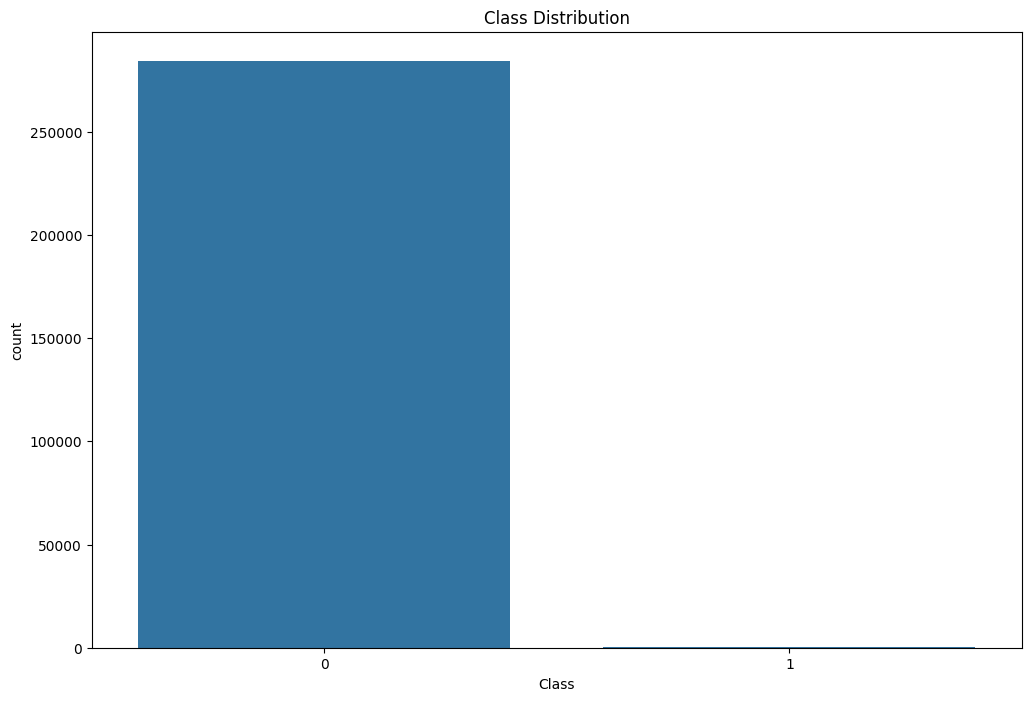

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Class', data=cc)
plt.title('Class Distribution')
plt.show()

From above plot, we can observe that Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.This imbalance problem may affect the performance of a model trained on this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle the class imbalance problem when building a model for fraud detection.

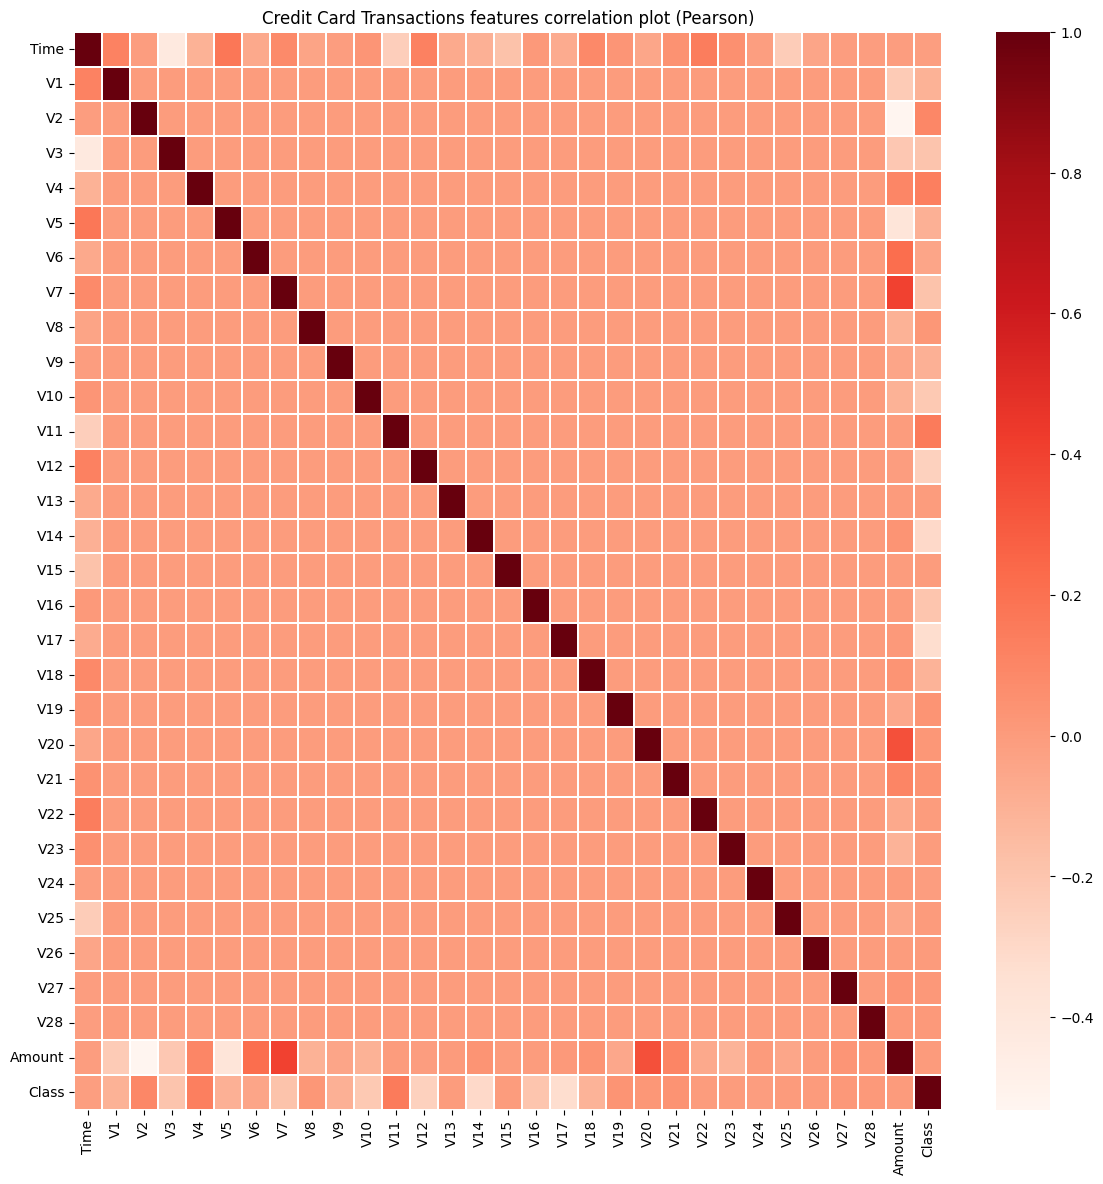

In [9]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = cc.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

From the above heatmap, it can be observed that there are no strong positive or negative correlations between any pairs of variables in the dataset. The strongest correlations are found: Time and V3, with a correlation coefficient of -0.42 Amount and V2, with a correlation coefficient of -0.53 Amount and V4, with a correlation coefficient of 0.4. Although these correlations are relatively high, the risk of multicollinearity is not expected to be significant. Overall, the heatmap suggests that there are no highly correlated variables that need to be removed before building a machine learning model.

Each scatter plot represents the relationship between the 'Time' and 'Amount' features for both legitimate (Class 0) and fraudulent (Class 1) transactions.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



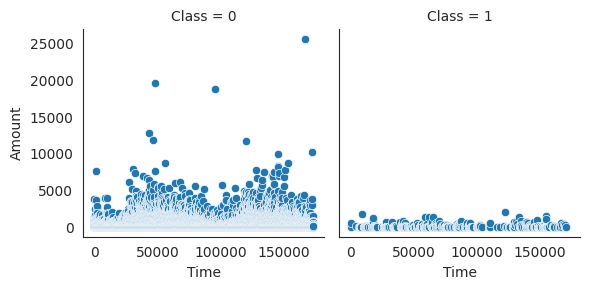

In [10]:
sns.set_style(style= 'white')
facet_grid = sns.FacetGrid(data=cc, col='Class')
facet_grid.map(sns.scatterplot, 'Time', 'Amount', palette='Paired_r')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

The plots and graphs clearly indicate that the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1). To address this imbalance, we need to differentiate between the legitimate and fraudulent data and use techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to balance the data. Instead of undersampling, SMOTE oversamples the minority class by generating synthetic samples to achieve a more balanced distribution of classes. Therefore, the correct statement should be:

In [11]:
# diffrentiating the fraud and legit data.
fraud = cc[cc['Class'] == 1]
legit = cc[cc['Class'] == 0]

In [12]:
print(fraud.shape)
print(legit.shape)

(492, 31)
(284315, 31)


Now, we will check the fraudulent transactions occur more often during certain time frame

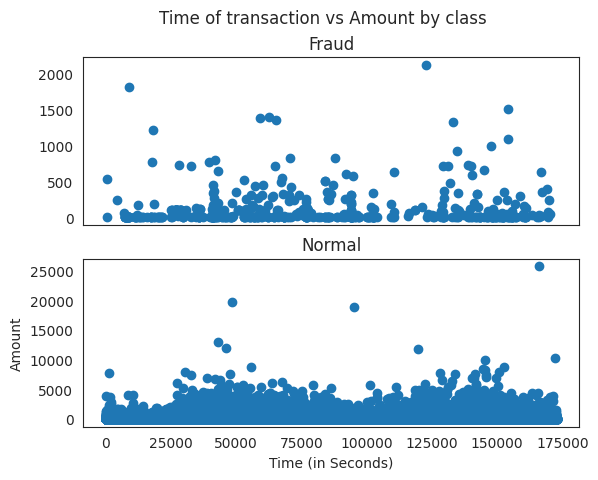

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [14]:
#Transactions in time
class_0 = cc.loc[cc['Class'] == 0]["Time"]
class_1 = cc.loc[cc['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.

In [15]:
cc['Hour'] = cc['Time'].apply(lambda x: np.floor(x / 3600))

tmp = cc.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


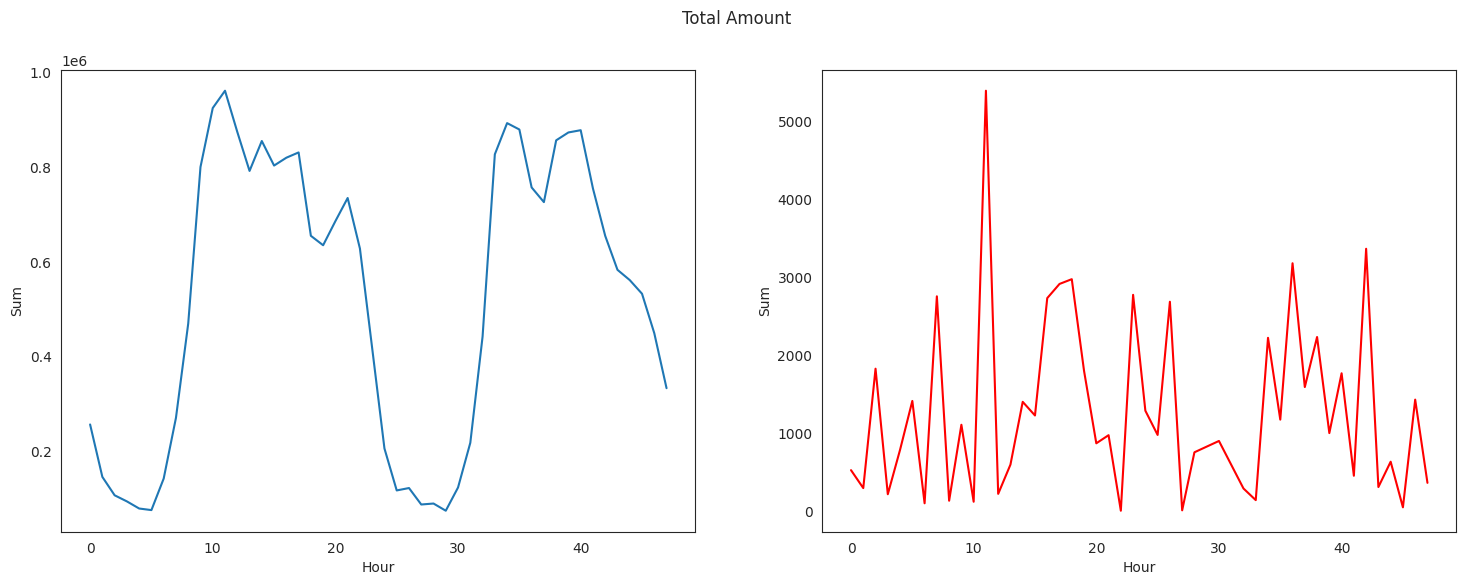

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

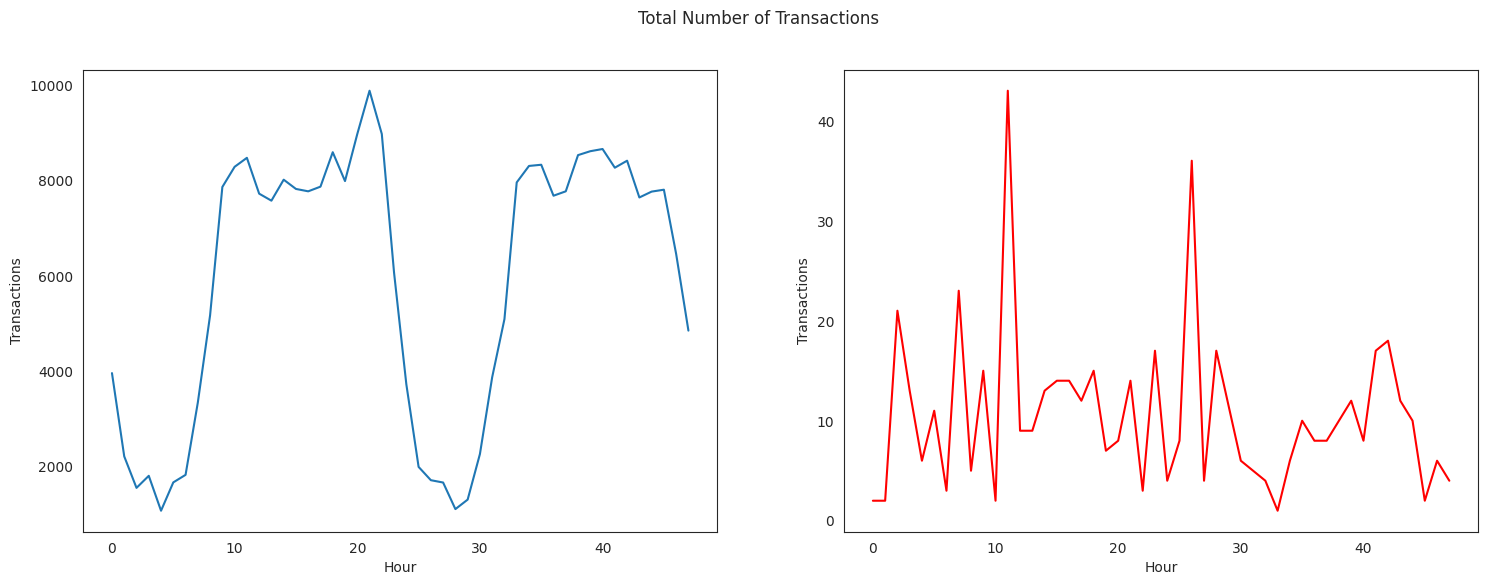

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

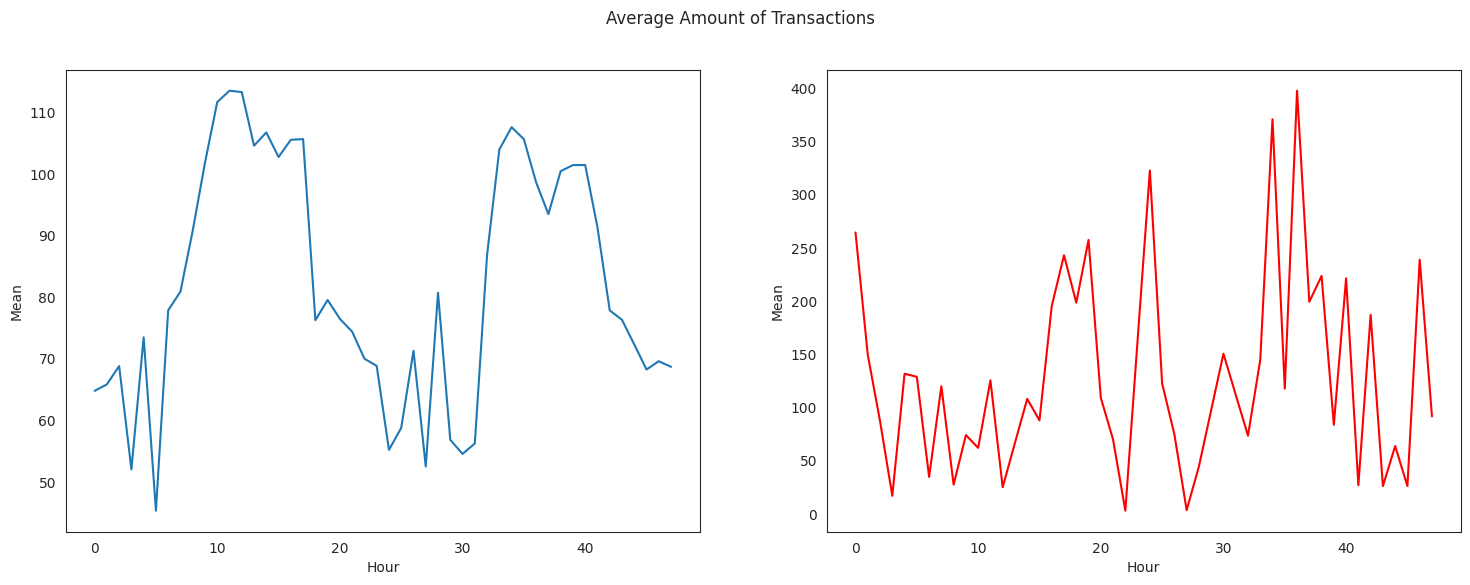

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

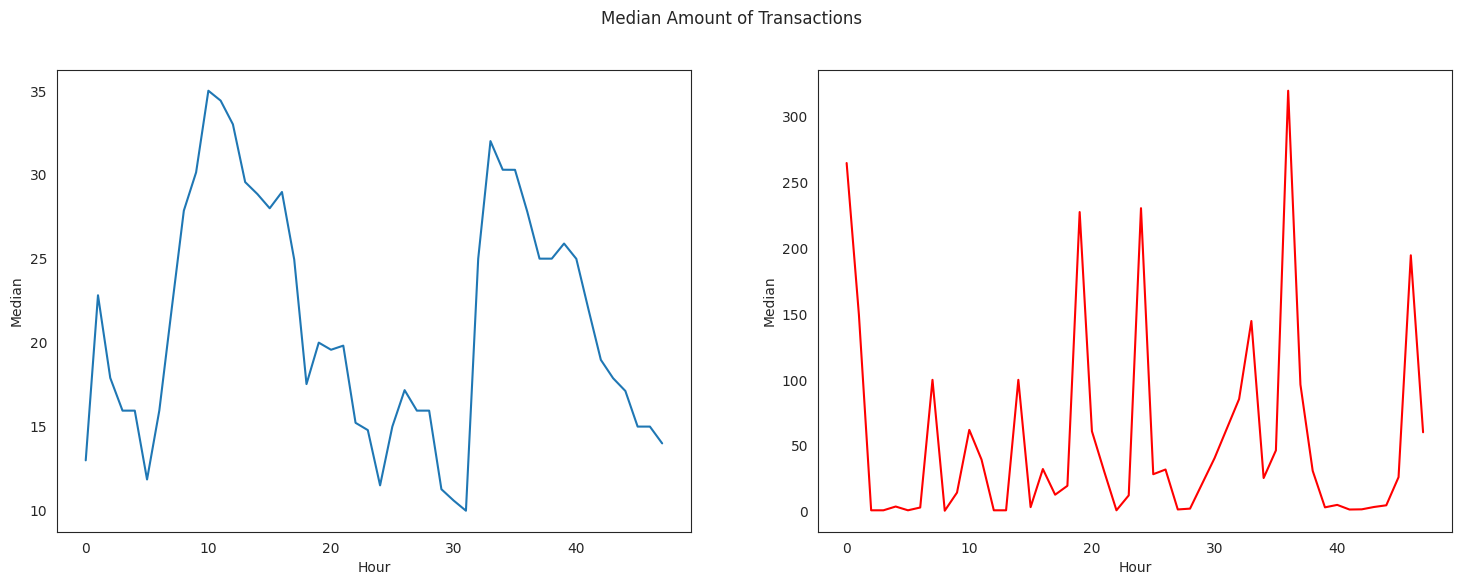

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

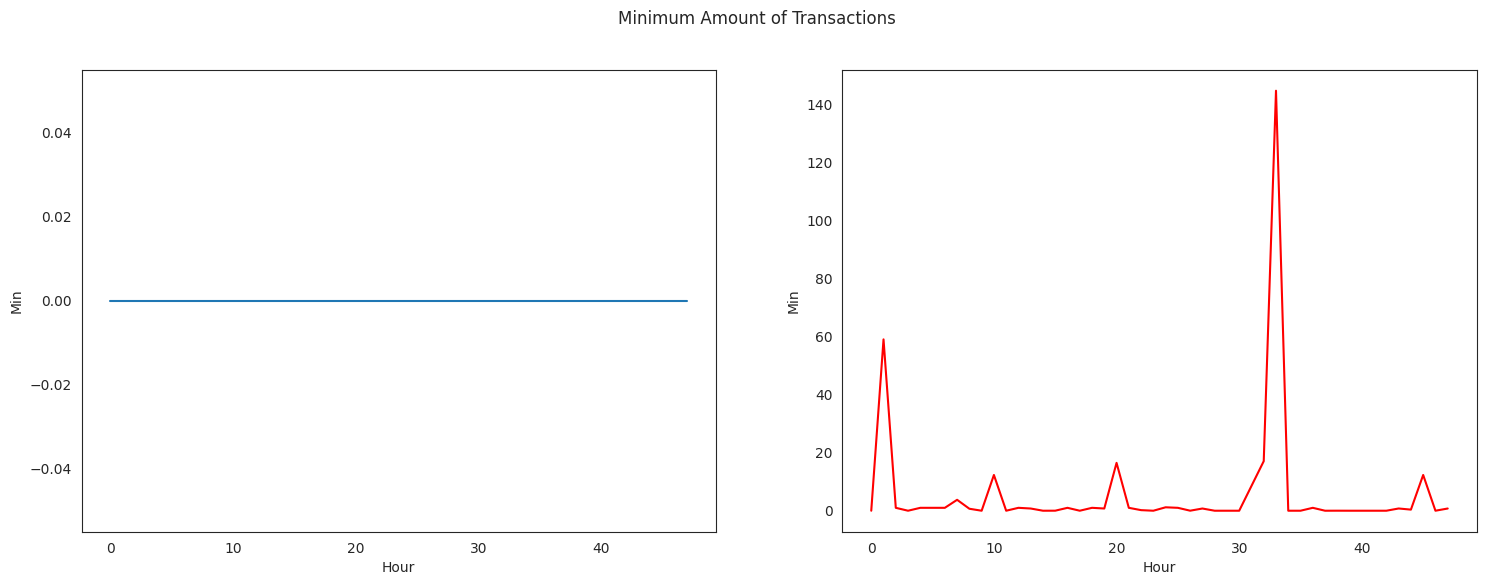

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

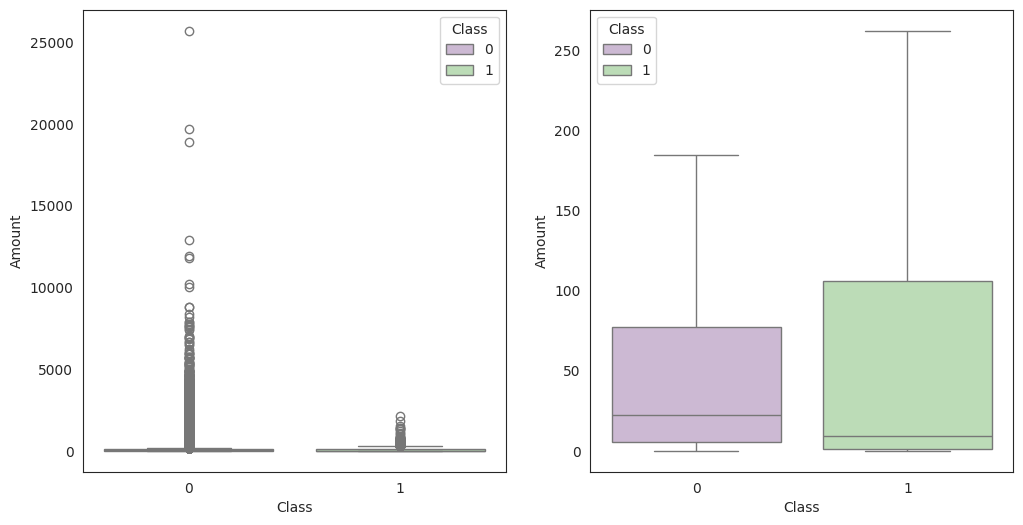

In [21]:
## Transactions amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=cc, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=cc, palette="PRGn",showfliers=False)
plt.show();

In [22]:
tmp = cc[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

In [24]:
fraud = cc.loc[cc['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True),
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

In [25]:
X = cc.drop('Class', axis=1)
y = cc['Class']

In [26]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(pd.Series(y_resampled).value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


### Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

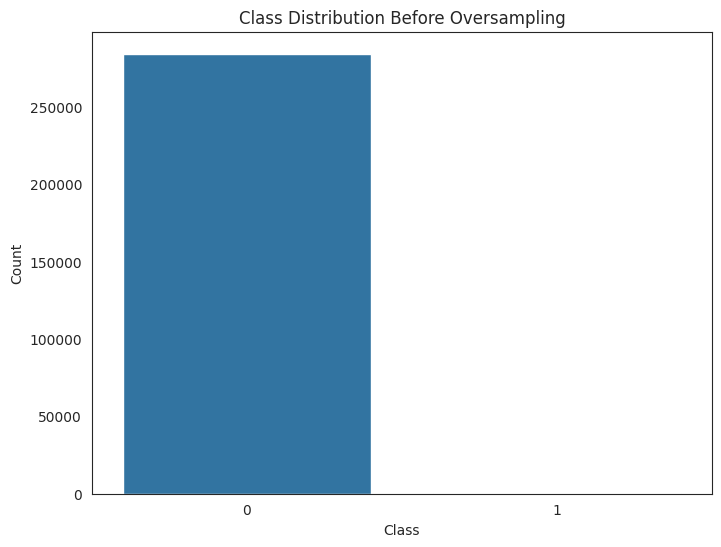

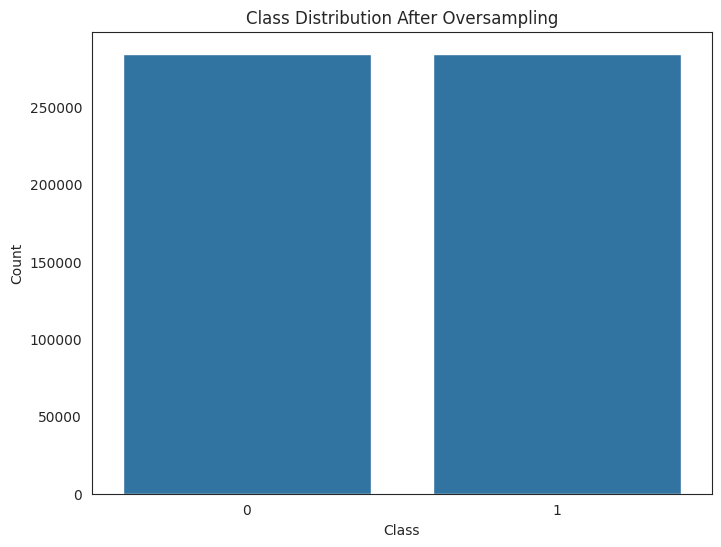

In [27]:
# Plot class distribution before oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=cc)
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# Plot class distribution after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [29]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (398041, 31)
X_test shape: (170589, 31)
y_train shape: (398041,)
y_test shape: (170589,)


In [30]:
#clf = RandomForestClassifier(n_jobs=NO_JOBS,
                            # random_state=RANDOM_STATE,
                            # criterion=RFC_METRIC,
                            # n_estimators=NUM_ESTIMATORS,
                            # verbose=False)

## Let's train the RandonForestClassifier using the train_df data and fit function.
#clf.fit(train_df[predictors], train_df[target].values)
#preds = clf.predict(valid_df[predictors])

In [31]:
# Defining the pipeline for Logistic Regression
LR_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42))
])

In [32]:
# Defining the parameter grid for grid search with Logistic Regression
params_grid = {"logistic__class_weight": [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 50}, 'balanced']}

In [33]:
grid_search = GridSearchCV(LR_pipeline, params_grid, n_jobs=-1, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 5},
                                                    {0: 1, 1: 50},
                                                    'balanced']},
             scoring='f1')

In [34]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'logistic__class_weight': 'balanced'}


In [35]:
LR_best_model = grid_search.best_estimator_
y_pred_LR = LR_best_model.predict(X_test)

In [36]:
cm_LR = confusion_matrix(y_test, y_pred_LR)

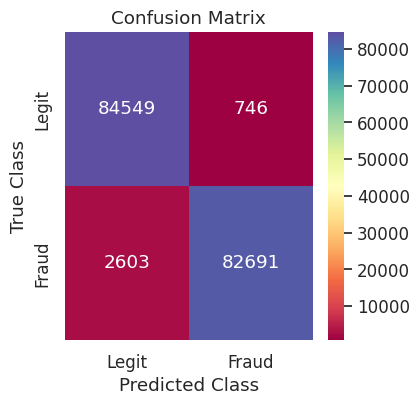

In [37]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_LR, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


In [38]:
print("Classification Report:")
print(classification_report(y_test, y_pred_LR))
print("Accuracy Score:", accuracy_score(y_test, y_pred_LR))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_LR))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85295
           1       0.99      0.97      0.98     85294

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589

Accuracy Score: 0.9803680190399147
ROC AUC Score: 0.9803679552261381


logistic model Overall seems to perform very well, with high precision, recall, accuracy, and ROC AUC score for both classes. This suggests that the model is effective in identifying fraudulent transactions while minimizing false positives.

In [39]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf_HGBC = HistGradientBoostingClassifier(loss = 'binary_crossentropy', learning_rate=0.1, max_leaf_nodes=150, min_samples_leaf = 150, max_depth=15, random_state=0)

In [40]:
clf_HGBC.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:1998: FutureWarning:

The loss 'binary_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.



HistGradientBoostingClassifier(loss='binary_crossentropy', max_depth=15,
                               max_leaf_nodes=150, min_samples_leaf=150,
                               random_state=0)

In [41]:
Y_pred_HGBC = clf_HGBC.predict(X_test)
cm_HGBC = confusion_matrix(y_test, Y_pred_HGBC)

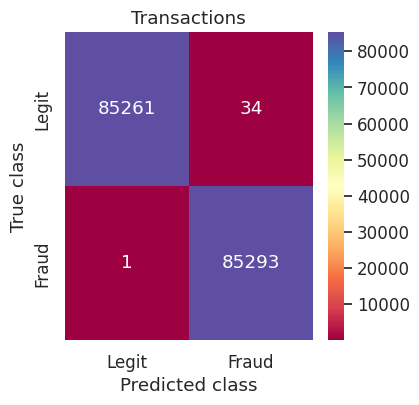

In [42]:
#confusion matrix:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_HGBC, cmap = 'Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [43]:
Y_pred_proba_train_HGBC = clf_HGBC.predict_proba(X_train)
roc_auc_score_Train_HGBC = roc_auc_score(y_train, Y_pred_proba_train_HGBC[:,1])
print('Train set roc-auc:', roc_auc_score_Train_HGBC)

Y_pred_proba_test_HGBC = clf_HGBC.predict_proba(X_test)
roc_auc_score_Test_HGBC = roc_auc_score(y_test, Y_pred_proba_test_HGBC[:,1])
print('Test set roc_auc:', roc_auc_score_Test_HGBC)

Train set roc-auc: 0.9999995382633646
Test set roc_auc: 0.9999932841263229


In [44]:
cr_HGBC = classification_report(y_test, Y_pred_HGBC)
print('HGBC')
print(cr_HGBC)

HGBC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



Overall, the HGBC model demonstrates perfect performance on the test set, achieving 100% accuracy with perfect precision, recall, and F1-score for both classes. This suggests that the model is highly effective in distinguishing between legitimate and fraudulent transactions in this dataset.

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

In [46]:
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [47]:
best_dtree_model = grid_search.best_estimator_

In [48]:
y_pred_dtree = best_dtree_model.predict(X_test)

In [49]:
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

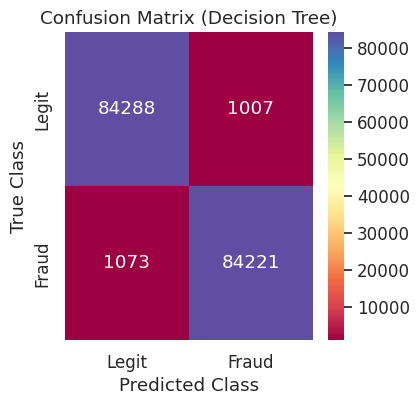

In [50]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_dtree, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix (Decision Tree)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [51]:
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dtree))
# Accuracy score
print("Accuracy Score (Decision Tree):", accuracy_score(y_test, y_pred_dtree))

# ROC AUC score
print("ROC AUC Score (Decision Tree):", roc_auc_score(y_test, y_pred_dtree))

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85295
           1       0.99      0.99      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

Accuracy Score (Decision Tree): 0.9878069512102187
ROC AUC Score (Decision Tree): 0.9878069489418058


The Decision Tree model performs exceptionally well in distinguishing between legitimate and fraudulent transactions, as shown by its high accuracy, precision, recall, F1-score, and ROC AUC score.

In [52]:
from xgboost import XGBClassifier
folds = 3

# Define the range of hyperparameters
param_grid = {
    'learning_rate': [0.2, 0.6],
    'subsample': [0.3, 0.6, 0.9]
}

In [53]:
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

In [54]:
model_cv = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

In [55]:
model_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", model_cv.best_params_)
print("Best ROC AUC score:", model_cv.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'learning_rate': 0.6, 'subsample': 0.9}
Best ROC AUC score: 0.9999695106000823


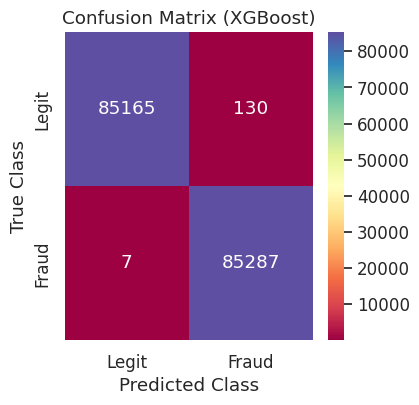

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [56]:
# Make predictions
y_pred_xgb = model_cv.predict(X_test)

# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualize the confusion matrix
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_xgb, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix (XGBoost)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Print classification report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

the XGBoost model demonstrates exceptional performance in distinguishing between legitimate and fraudulent transactions, achieving perfect classification results across all evaluation metrics. This indicates that the model is highly effective and reliable for fraud detection in this dataset.

In [57]:
metrics = {
    'Logistic Regression': [accuracy_score(y_test, y_pred_LR),
                            precision_score(y_test, y_pred_LR),
                            recall_score(y_test, y_pred_LR),
                            f1_score(y_test, y_pred_LR),
                            roc_auc_score(y_test, y_pred_LR)],
    'HistGradientBoostingClassifier': [accuracy_score(y_test, Y_pred_HGBC),
                                       precision_score(y_test, Y_pred_HGBC),
                                       recall_score(y_test, Y_pred_HGBC),
                                       f1_score(y_test, Y_pred_HGBC),
                                       roc_auc_score(y_test, Y_pred_HGBC)],
    'Decision Tree': [accuracy_score(y_test, y_pred_dtree),
                      precision_score(y_test, y_pred_dtree),
                      recall_score(y_test, y_pred_dtree),
                      f1_score(y_test, y_pred_dtree),
                      roc_auc_score(y_test, y_pred_dtree)],
    'XGBoost': [accuracy_score(y_test, y_pred_xgb),
                precision_score(y_test, y_pred_xgb),
                recall_score(y_test, y_pred_xgb),
                f1_score(y_test, y_pred_xgb),
                roc_auc_score(y_test, y_pred_xgb)]
}


In [58]:
metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC Score'])

In [59]:
metrics_df = metrics_df.transpose()

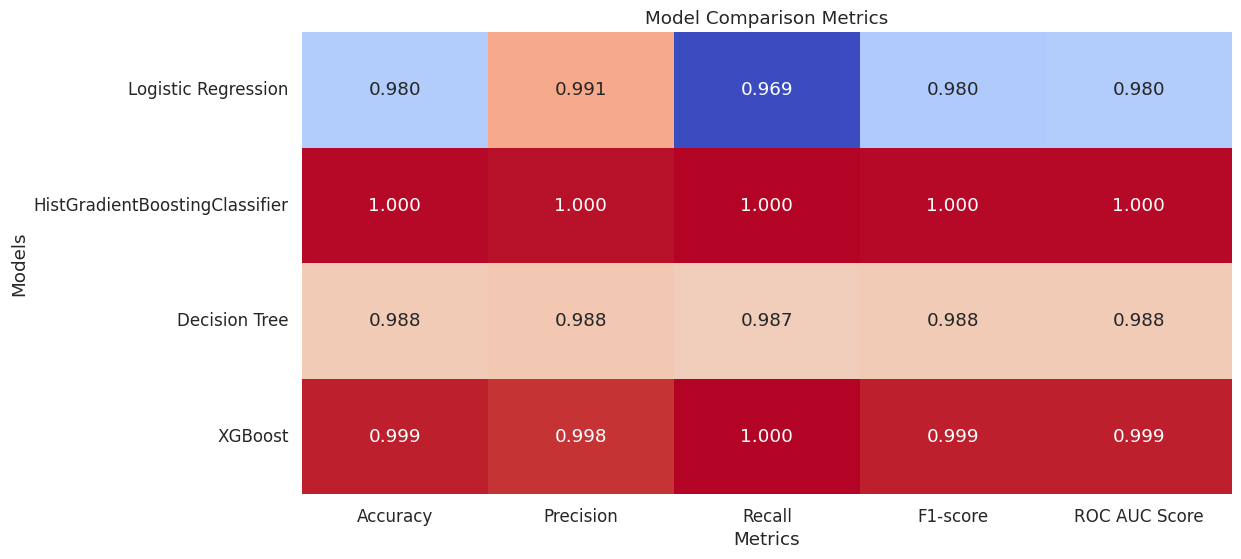

In [60]:
plt.figure(figsize=(12, 6))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', fmt=".3f", cbar=False)
plt.title('Model Comparison Metrics')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()

In [61]:
# Dump and save Logistic Regression model
with open('LR_model.pkl', 'wb') as file:
    pickle.dump(LR_best_model, file)

# Dump and save HistGradientBoostingClassifier model
with open('HGBC_model.pkl', 'wb') as file:
    pickle.dump(clf_HGBC, file)

# Dump and save Decision Tree model
with open('dtree_model.pkl', 'wb') as file:
    pickle.dump(best_dtree_model, file)

# Dump and save XGBoost model
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model_cv, file)

### model selection:
### Overall, the models, including Logistic Regression, HistGradientBoostingClassifier, Decision Tree, and XGBoost, perform well in detecting fraudulent transactions. However, based on the comparison, the HistGradientBoostingClassifier stands out as the best-performing model across multiple metrics.